In [3]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('tensorboard/MNIST_data',one_hot=True)

Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting tensorboard/MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting tensorboard/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting tensorboard/MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting tensorboard/MNI

In [1]:
W_c_1_val, b_c_1_val, W_c_2_val, b_c_2_val, W_f_1_val, b_f_1_val, W_f_2_val, b_f_2_val, convo_1_val, convo_1_pooling_val, convo_2_val, convo_2_pooling_val, full_layer_one_val

NameError: name 'W_c_1_val' is not defined

In [52]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape,stddev=0.1) # random as normal distribution but only in 2SD
    return tf.Variable(init_random_dist)
def init_bias(shape):
    init_bias_vals = tf.constant(0.1,shape=shape)
    return tf.Variable(init_bias_vals)

# conv func
def conv2d(x,W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME', name='conv2d')
def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')

# layer func
def convolutional_layer(input_x, shape):
    # [Height, Weight, Channel(l-1), Channel(l)]
    W = init_weights(shape)
    b = init_bias([shape[3]]) # shape[3] -> current # of channels
    return tf.nn.relu( conv2d(input_x, W) + b), W, b
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return (tf.matmul(input_layer, W) + b), W, b

# Placeholders
x = tf.placeholder(tf.float32, shape=[None, 784])
y_true = tf.placeholder(tf.float32, shape=[None, 10])

# initiate layer
x_image = tf.reshape(x, [-1, 28, 28, 1])
convo_1, W_c_1, b_c_1 = convolutional_layer(x_image,shape=[6,6,1,32])
convo_1_pooling = max_pool_2by2(convo_1)

convo_2, W_c_2, b_c_2 = convolutional_layer(convo_1_pooling, [6, 6, 32, 64])
convo_2_pooling = max_pool_2by2(convo_2)

# Why 7 by 7 image? Because we did 2 pooling layers, so (28/2)/2 = 7
# 64 then just comes from the output of the previous Convolution
convo_2_flat = tf.reshape(convo_2_pooling, [-1, 7*7*64])

full, W_f_1, b_f_1 = normal_full_layer(convo_2_flat, 1024)
full_layer_one = tf.nn.relu(full)

# placeholder
hold_prob = tf.placeholder(tf.float32)
full_one_dropout = tf.nn.dropout(full_layer_one, keep_prob=hold_prob)

y_pred, W_f_2, b_f_2 = normal_full_layer(full_one_dropout, 10) # output 0-9

# Loss Function
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred))
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)
train = optimizer.minimize(cross_entropy)

init = tf.global_variables_initializer()

# Session
steps = 100
sess = tf.InteractiveSession()
sess.run(init)

for i in range(steps):
    batch_x, batch_y = mnist.train.next_batch(50)
    sess.run(train, feed_dict={x:batch_x, y_true: batch_y, hold_prob: 0.5})

    # print output every 100 steps
    if i%100 == 0:
        print('Currently on step {}'.format(i))
        print('Accuracy is ')

        matches = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))
        acc = tf.reduce_mean(tf.cast(matches, tf.float32))
        acc_val, W_c_1_val, b_c_1_val, W_c_2_val, b_c_2_val, W_f_1_val, b_f_1_val, W_f_2_val, b_f_2_val, convo_1_val, convo_1_pooling_val, convo_2_val, convo_2_pooling_val, full_layer_one_val = sess.run([acc, W_c_1, b_c_1, W_c_2, b_c_2, W_f_1, b_f_1, W_f_2, b_f_2, convo_1, convo_1_pooling, convo_2, convo_2_pooling, full_layer_one], feed_dict={x: mnist.test.images, y_true: mnist.test.labels, hold_prob: 1.0})
        print(acc_val)
        print('\n')

Currently on step 0
Accuracy is 
0.1009




In [57]:
W_c_1_val.shape, W_c_2_val.shape, convo_1_val.shape, convo_1_pooling_val.shape

((6, 6, 1, 32), (6, 6, 32, 64), (10000, 28, 28, 32), (10000, 14, 14, 32))

### Visualize Weight
I cannot visualize it TT

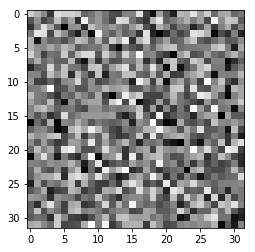

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

img_0 = W_f_2_val[:,9].reshape(32,-1)
plt.imshow(img_0, cmap='gist_gray')

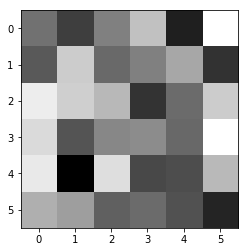

In [40]:
img_0 = W_c_1_val[:,:,0,2]
plt.imshow(img_0, cmap='gist_gray')